# Startup Dataset Analysis

Question 1.  Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance But due to its financial restriction, he can choose only between three locations - Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi" Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore" "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

# Importing required libraries

In [3]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import collections



# Loading and cleaning data

In [4]:
df = pd.read_csv("startup_funding.csv" , encoding = "UTF-8")

Renaming Columns Names

In [5]:
df.rename(columns = {'Date dd/mm/yyyy': "Date"} , inplace = True)
df.rename(columns = {'Startup Name': "StartupName"}, inplace = True)
df.rename(columns = {'Industry  Vertical':'IndustryVertical'}, inplace = True)
df.rename(columns = {'City  Location': "City"}, inplace = True)
df.rename(columns = {'Investors Name':"InvestorsName"}, inplace = True)
df.rename(columns = {'Amount in USD':'AmountInUSD'}, inplace = True)
df.rename(columns = {'InvestmentnType':'InvestmentType'}, inplace = True)

In [6]:
df.replace('Bengaluru','Bangalore', inplace = True)
df.replace("Gurugram", "Gurgaon", inplace = True)
df.replace("Delhi", "New Delhi", inplace = True)

In [7]:
df.head()

,Sr No,Date,StartupName,Industry Vertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


# Solving problem statement

In [8]:
city_data = np.array(df.City) # converting the city column into numpy array
# cities name has multiple names separateds by "/", using split() to separate required cities
cities = []
for i in city_data:
    if i != np.nan:
        x = str(i).split('/')
        for k in x:
            if k[0] == ' ':
                k = k[1:]
            if k[-1] == ' ':
                k = k[:-1]
            cities.append(k)
            
Cities = np.array(cities)
#counting the number of cities usinf len() for Bangalore , Mumbai and NCR
bn = len(np.where(Cities == "Bangalore")[0])
mumb = len(np.where(Cities == "Mumbai")[0])
ncr = len(np.where((Cities == "New Delhi")|(Cities == "Gurgaon")|(Cities == "Noida"))[0])

# Plotting Graph

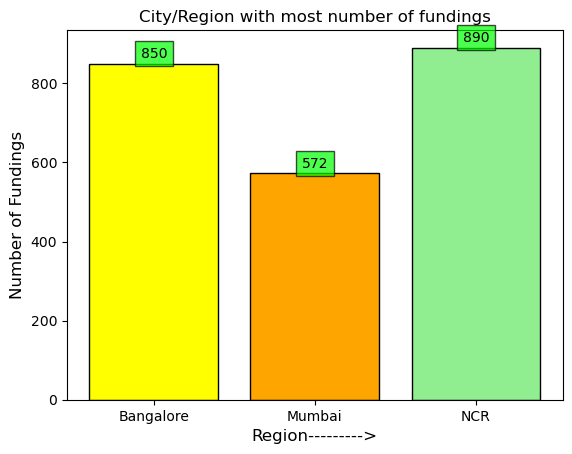

In [14]:
Cities = ["Bangalore" , "Mumbai" , "NCR"]
Count = [bn, mumb, ncr]
plt.bar(Cities , Count , color = ["Yellow", "Orange", "lightgreen"] , edgecolor = "black")
plt.ylabel("Number of Fundings" , fontsize = 12)
plt.xlabel("Region--------->" , fontsize = 12)
plt.title("City/Region with most number of fundings")
for i in range(len(Cities)):
    plt.text(i , Count[i]+15, Count[i] , ha ="center" ,fontsize = 10, bbox = dict(facecolor = "lime" , alpha = 0.7))
plt.show()